In [37]:
# from google.colab import drive
# drive.mount('/content/drive')

In [38]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import os

In [39]:
os.getcwd()

'f:\\Xử lý ảnh và ứng dụng\\Lab_02'

In [40]:
def plot_image(image_1, image_2,title_1="Orignal", title_2="New Image"):
    plt.figure(figsize=(10,10))
    plt.subplot(1, 2, 1)
    plt.imshow(image_1,cmap="gray")
    plt.title(title_1)
    plt.subplot(1, 2, 2)
    plt.imshow(image_2,cmap="gray")
    plt.title(title_2)
    plt.show()

In [41]:
def compute_hist(file_path):
  image = cv2.imread(file_path)
  image_resized = cv2.resize(image, (128, 256))
  image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
  # compute histogram
  hist = cv2.calcHist([image_gray],[0], None, [256], [0,256])
  cv2.normalize(hist,hist)
  return hist

In [42]:
def compute_hist_list(dir_root_path):
  hist_list = []
  file_path_list = []
  count = 0
  for dir in os.listdir(dir_root_path):
    dir_path = os.path.join(dir_root_path,dir)
    for file_name in os.listdir(dir_path):
      #save path
      file_path = os.path.join(dir_path,file_name)
      # print(file_path)
      file_path_list.append(file_path)
      count += 1
      print(count)

      # read image
      image = cv2.imread(file_path)
      image_resized = cv2.resize(image, (256, 256))
      image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)

      new_image = cv2.equalizeHist(image_gray)
      # compute histogram
      hist = cv2.calcHist([new_image],[0], None, [256], [0,256])
      cv2.normalize(hist,hist)
      hist_list.append(hist)
  return hist_list,file_path_list


In [43]:
# import cv2
# import numpy as np
# import os

# def compute_hist_list(dir_root_path):
#     hist_list = []
#     file_path_list = []
    
#     for dir in os.listdir(dir_root_path):
#         dir_path = os.path.join(dir_root_path, dir)
#         for file_name in os.listdir(dir_path):
#             # Save path
#             file_path = os.path.join(dir_path, file_name)
#             file_path_list.append(file_path)
#             print(file_path)

#             # Read image
#             image = cv2.imread(file_path)
#             image_resized = cv2.resize(image, (256, 256))
            
#             # Initialize mask for GrabCut
#             mask = np.zeros(image_resized.shape[:2], np.uint8)
#             bgd_model = np.zeros((1, 65), np.float64)
#             fgd_model = np.zeros((1, 65), np.float64)
            
#             # Define a rectangle (initial region where the object is located)
#             # This rectangle may need to be adjusted based on your dataset
#             rect = (10, 10, 246, 246)  # (x, y, width, height)
            
#             # Apply GrabCut algorithm
#             cv2.grabCut(image_resized, mask, rect, bgd_model, fgd_model, 5, cv2.GC_INIT_WITH_RECT)
            
#             # Update mask: pixels marked 0 or 2 are background, 1 or 3 are foreground
#             mask_2 = np.where((mask == 2) | (mask == 0), 0, 1).astype('uint8')
            
#             # Apply mask to image to isolate the object
#             image_foreground = image_resized * mask_2[:, :, np.newaxis]
            
#             # Convert the foreground image to grayscale
#             image_gray = cv2.cvtColor(image_foreground, cv2.COLOR_BGR2GRAY)
            
#             # Compute histogram
#             hist = cv2.calcHist([image_gray], [0], None, [256], [0, 256])
#             cv2.normalize(hist, hist)
#             hist_list.append(hist)
    
#     return hist_list, file_path_list


In [44]:
def compare_hist(hist_1, hist_2):
  similarity = cv2.compareHist(hist_1, hist_2, cv2.HISTCMP_BHATTACHARYYA) # cv2.HISTCMP_CHISQR
  return similarity


In [45]:
seg_path = '.\seg'


<>:1: SyntaxWarning: invalid escape sequence '\s'
<>:1: SyntaxWarning: invalid escape sequence '\s'
C:\Users\VINH\AppData\Local\Temp\ipykernel_17620\3626815149.py:1: SyntaxWarning: invalid escape sequence '\s'
  seg_path = '.\seg'


In [46]:
hist_list,file_path_list = compute_hist_list(seg_path)

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


In [47]:
print(len(hist_list))
print(len(file_path_list))



14034
14034


In [48]:
# import pickle

# # Lưu file_path_list
# with open('./Feature/normhist/path_hist_list.pkl', 'wb') as f:
#     pickle.dump(file_path_list, f)

# # Lưu hist_list
# with open('./Feature/normhist/hist_list.pkl', 'wb') as f:
#     pickle.dump(hist_list, f)


In [49]:
# # Đọc file_path_list
# import pickle
# with open('./Feature/normhist/path_hist_list.pkl', 'rb') as f:
#     file_path_list = pickle.load(f)

# # Đọc hist_list
# with open('./Feature/normhist/hist_list.pkl', 'rb') as f:
#     hist_list = pickle.load(f)


In [50]:
print(len(hist_list))
print(len(file_path_list))

14034
14034


In [51]:
# def load_id(seg_test_path):
#   id_list = []
#   test_path_list = []
#   for dir in os.listdir(seg_test_path):
#     dir_path = os.path.join(seg_test_path,dir)
#     for file_name in os.listdir(dir_path):
#       #save path
#       file_path = os.path.join(dir_path,file_name)
#       print(file_path)
#       file_path_list.append(file_path)

#       # read image
#       image = cv2.imread(file_path)
#       image_resized = cv2.resize(image, (128, 256))
#       image_gray = cv2.cvtColor(image_resized, cv2.COLOR_BGR2GRAY)
#       # compute histogram
#       hist = cv2.calcHist([image_gray],[0], None, [256], [0,256])
#       cv2.normalize(hist,hist)
#       hist_list.append(hist)
#   return hist_list,file_path_list


# hist_list,file_path_list = compute_hist_list(seg_path)

In [52]:
import heapq
from scipy.spatial import distance

def take_dist_and_path(img_feature_input):

    distances = []
    K = 10
    input_hist = compute_hist(img_feature_input)
    for idx, hist in enumerate(hist_list):
      dist = compare_hist(input_hist, hist)
      distances.append( (dist, file_path_list[idx]))
    dist_sorted = sorted(distances, key=lambda x: x[0])[:10]
    return dist_sorted


In [53]:
dist_sorted = []

In [54]:
import matplotlib.pyplot as plt

def mul_image(input_img_path):
  # Tạo figure với số hàng và cột tương ứng
  fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(15, 9))

  # Hiển thị ảnh root ở hàng đầu tiên, cột đầu tiên
  img_root = cv2.imread(input_img_path)
  img_root_rgb = cv2.cvtColor(img_root, cv2.COLOR_BGR2RGB)
  axes[0, 0].imshow(img_root_rgb)
  axes[0, 0].axis('off')  # Tắt trục để ảnh đẹp hơn
  axes[0, 0].set_title("Root Image")  # Tiêu đề cho ảnh gốc


  # Để các ô còn lại của hàng đầu tiên trống
  for j in range(1, 5):
      axes[0, j].axis('off')

  # Hiển thị 10 ảnh từ dist_sorted vào 2 hàng còn lại
  for i in range(2):
      for j in range(5):
          img = cv2.imread(dist_sorted[i * 5 + j][1])
          img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

          img_type = dist_sorted[i * 5 + j][1].split('/')[-1]

          distance = dist_sorted[i * 5 + j][0]

          axes[i+1, j].imshow(img)
          axes[i+1, j].axis('off')  # Tắt trục
          axes[i + 1, j].set_title(f'Loại: {img_type}\n dist: {distance}', fontsize=10)  # Tiêu đề là tên ảnh
  plt.tight_layout()
  plt.show()

mountain
21466.jpg
[(0.3318361564610228, '.\\seg\\street\\8351.jpg'), (0.33569778017764057, '.\\seg\\street\\5085.jpg'), (0.3408799681810305, '.\\seg\\glacier\\15370.jpg'), (0.3438672817154232, '.\\seg\\street\\9744.jpg'), (0.34556628154641744, '.\\seg\\street\\8598.jpg'), (0.3492142099767012, '.\\seg\\street\\10780.jpg'), (0.349308859626469, '.\\seg\\forest\\4191.jpg'), (0.3494200758970892, '.\\seg\\street\\16870.jpg'), (0.34943574381243014, '.\\seg\\sea\\4617.jpg'), (0.3511905795135263, '.\\seg\\street\\9847.jpg')]


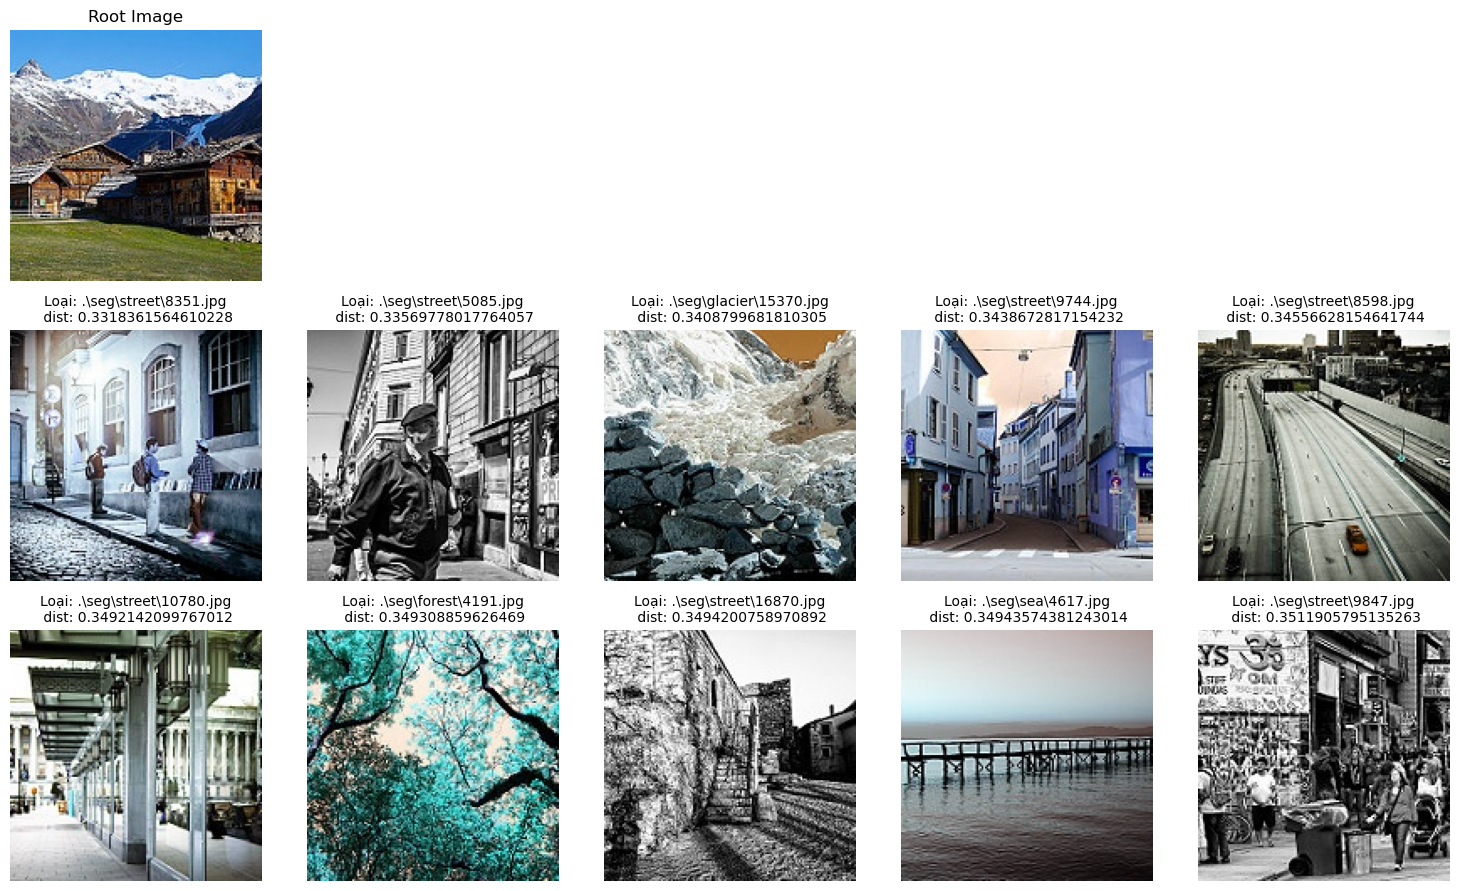

In [59]:
import random
number = 20057
folder_list = ['forest', 'mountain','street', 'buildings', 'glacier', 'sea']
folder_random = random.choice(folder_list)
print(folder_random)
file_random = random.choice(os.listdir(f'./seg_test/{folder_random}'))
print(file_random)
input_path = f'./seg_test/{folder_random}/{file_random}'
dist_sorted = take_dist_and_path(input_path)
print(dist_sorted)

mul_image(input_path)